In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df=pd.read_csv("C:/CSV files/loan_grant.csv")

In [3]:
df

,Loan_ID,Gender,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,5849,NaN,Y
1,LP001003,Male,4583,128.0,N
2,LP001005,Male,3000,66.0,Y
3,LP001006,Male,2583,120.0,Y
4,LP001008,Male,6000,141.0,Y
...,...,...,...,...,...
609,LP002978,Female,2900,71.0,Y
610,LP002979,Male,4106,40.0,Y
611,LP002983,Male,8072,253.0,Y
612,LP002984,Male,7583,187.0,Y


In [18]:
df.isnull().sum()

Gender             0
ApplicantIncome    0
LoanAmount         0
Loan_Status        0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [17]:
df.drop(["Loan_ID"],axis=1,inplace=True)

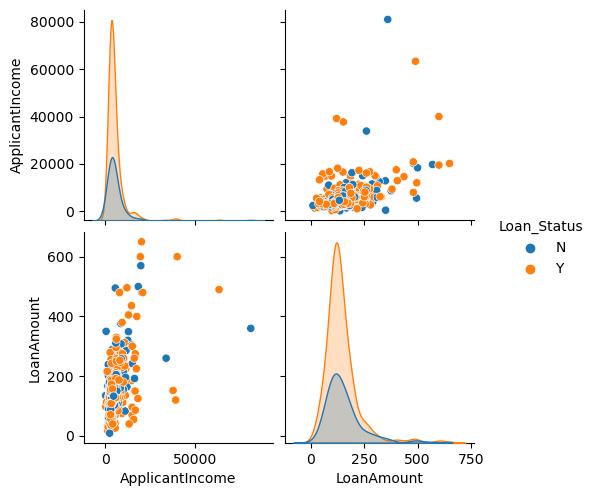

In [6]:
sns.pairplot(data=df,hue="Loan_Status")

In [19]:
le=LabelEncoder()
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])

In [20]:
df["Loan_Status"].unique()

array([0, 1], dtype=int64)

In [21]:

df["Gender"]=le.fit_transform(df["Gender"])

In [22]:
df["Gender"].unique()

array([1, 0], dtype=int64)

In [23]:
X=df.drop(["Loan_Status"],axis=1)

In [24]:
y=df["Loan_Status"]

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [27]:
gd=GaussianNB()
gd.fit(X_train,y_train)

GaussianNB()

In [28]:
y_pred=gd.predict(X_test)

In [31]:
print("accuracy score",accuracy_score(y_test,y_pred))

accuracy score 0.6724137931034483


In [33]:
print("confusion_matrix\n",confusion_matrix(y_test,y_pred))

confusion_matrix
 [[  0  56]
 [  1 117]]


In [34]:
print("classification_report\n",classification_report(y_test,y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.68      0.99      0.80       118

    accuracy                           0.67       174
   macro avg       0.34      0.50      0.40       174
weighted avg       0.46      0.67      0.55       174

